In [1]:
from plot_module import save_plot

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Cleaned_data.csv')

In [3]:
df.head()

,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
0,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0.0
1,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,14508756.0
2,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,1207520.0
3,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,487324.0
4,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,114808.0


### Oil production data

In [4]:
df['Commodity'].value_counts()

Commodity
Gas (Mcf)    235415
Oil (bbl)    235415
Name: count, dtype: int64

In [5]:
df_oil = df[df['Commodity'] == 'Oil (bbl)'].copy()

In [6]:
df_oil.head()

,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
43,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Alaska,Oil (bbl),1,Sales-Royalty Due-MEASURED,54848.0
44,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Oil (bbl),1,Sales-Royalty Due-MEASURED,34110265.0
45,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Oil (bbl),1,Sales-Royalty Due-MEASURED,71204.0
46,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Oil (bbl),4,Sales-Royalty Due-Not Measured,3278.0
47,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Oil (bbl),4,Sales-Royalty Due-Not Measured,0.0


In [7]:
df_monthly_oil = df_oil.groupby('Production Date')['Volume'].sum().reset_index()

In [8]:
df_monthly_oil.head()

,Production Date,Volume
0,2015-01-01,67515553.0
1,2015-02-01,61664960.0
2,2015-03-01,66342950.0
3,2015-04-01,67719040.0
4,2015-05-01,66484591.0


In [9]:
df_monthly_oil['Production Date'].is_monotonic_increasing

True

### Save Monthly Oil Data

In [10]:
df_monthly_oil.to_csv('Monthly_oil_data.csv', index=False)

### Checking Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf(x): 
    res = adfuller(x)
    print('Test Statistic:', res[0]) 
    print('P-Value:', res[1]) 

    if res[1] < 0.05: 
        print('Stationary')
    else:
        print('Non-Stationary') 

adf(df_monthly_oil.Volume)

Test Statistic: -1.344737549600928
P-Value: 0.6084645921750879
Non-Stationary


### Monthly Production Over Time

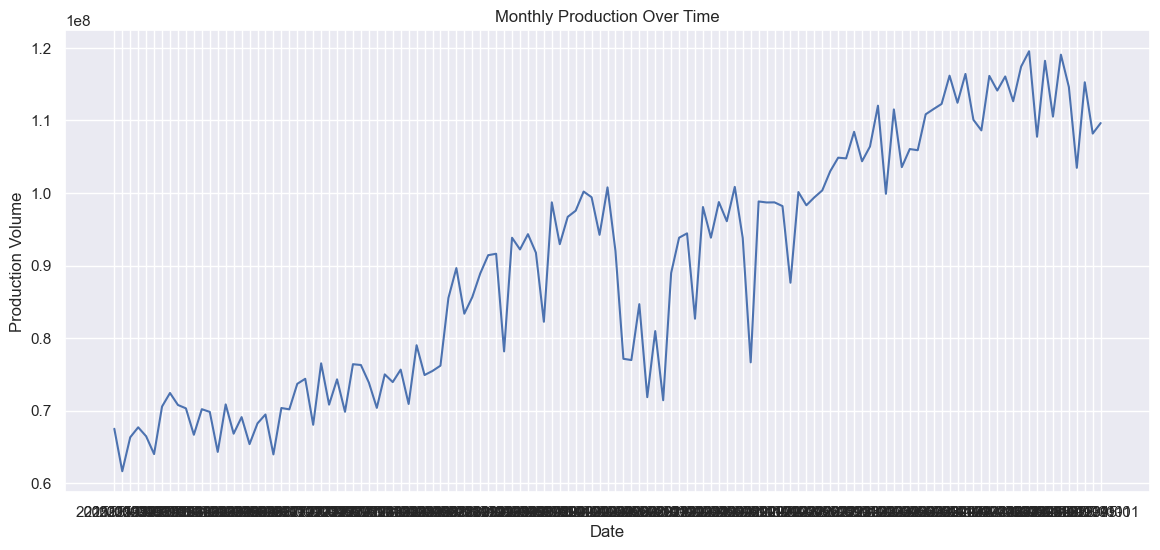

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df_monthly_oil['Production Date'], df_monthly_oil['Volume'])
plt.title('Monthly Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production Volume')
plt.show()

### Rolling average

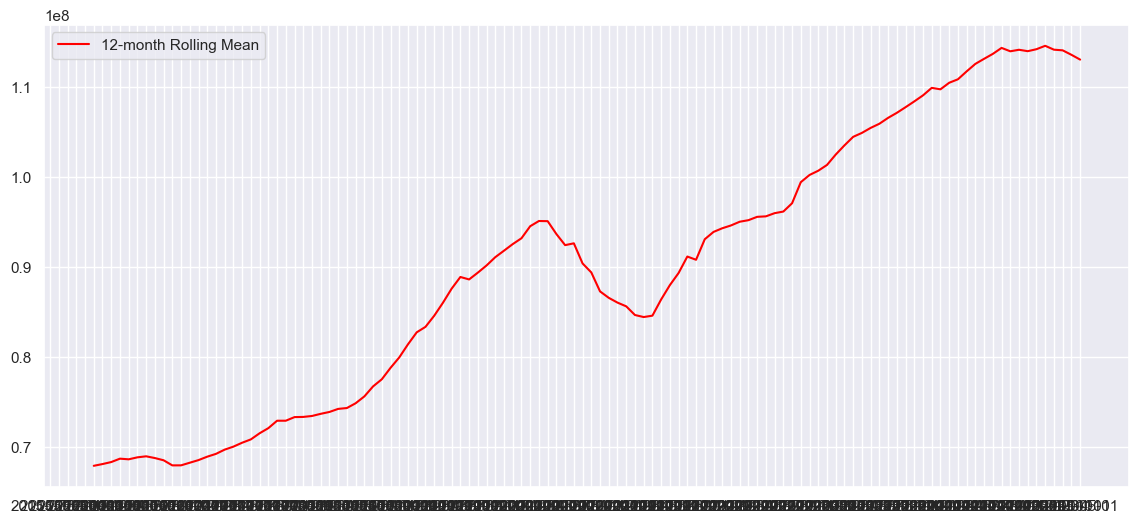

In [13]:
plt.figure(figsize=(14,6))
df_monthly_oil['rolling_12'] = df_monthly_oil['Volume'].rolling(12).mean()
plt.plot(df_monthly_oil['Production Date'], df_monthly_oil['rolling_12'], color='red', label='12-month Rolling Mean')
plt.legend()
plt.show()

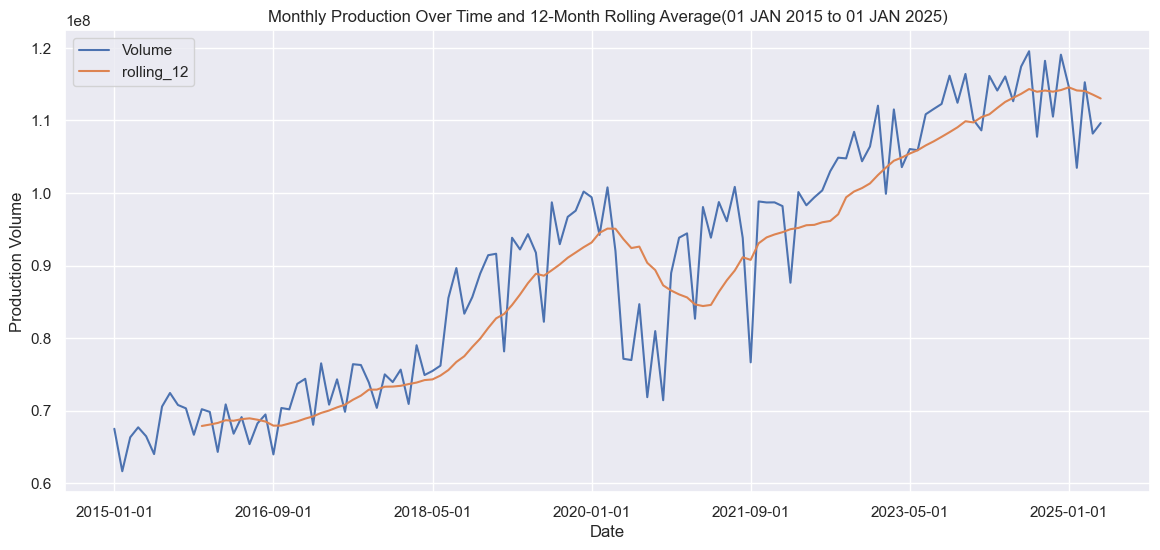

In [14]:
ax = df_monthly_oil.plot(x='Production Date', y=['Volume', 'rolling_12'], figsize=(14, 6))
ax.set_title('Monthly Production Over Time and 12-Month Rolling Average(01 JAN 2015 to 01 JAN 2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Production Volume')

fig = ax.get_figure()
save_plot(fig, 'Monthly production')

### Year over year production change

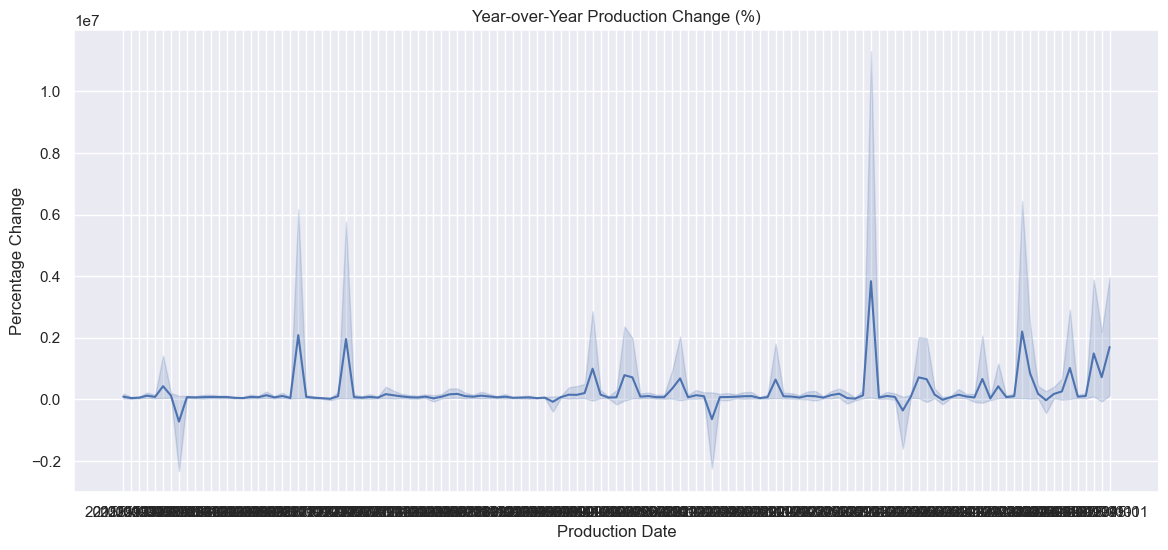

In [15]:
df['pct_change'] = df['Volume'].pct_change(periods=12) * 100
plt.figure(figsize=(14,6))
sns.lineplot(x='Production Date', y='pct_change', data=df)
plt.title('Year-over-Year Production Change (%)')
plt.ylabel('Percentage Change')
plt.show()

### Boxplot of Monthly Production Volume

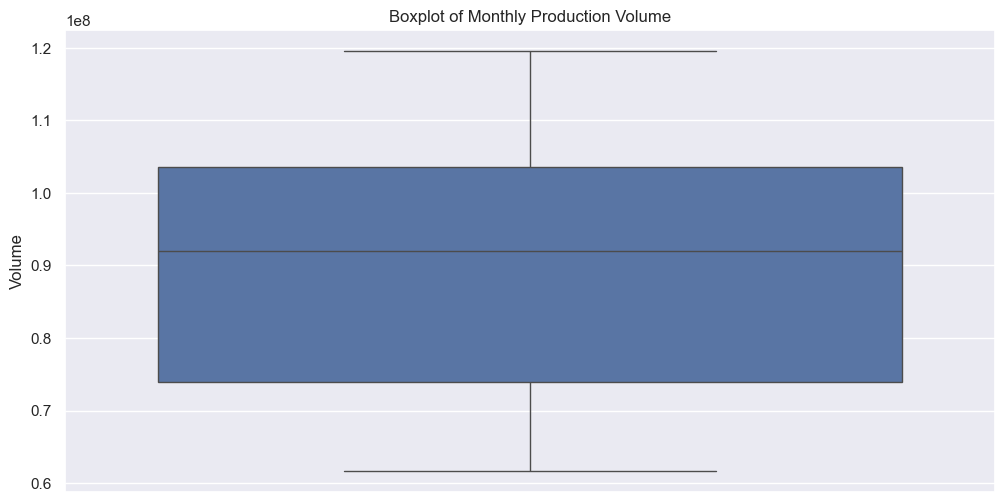

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(df_monthly_oil['Volume'])
plt.title('Boxplot of Monthly Production Volume')
plt.show()

### Seasonality

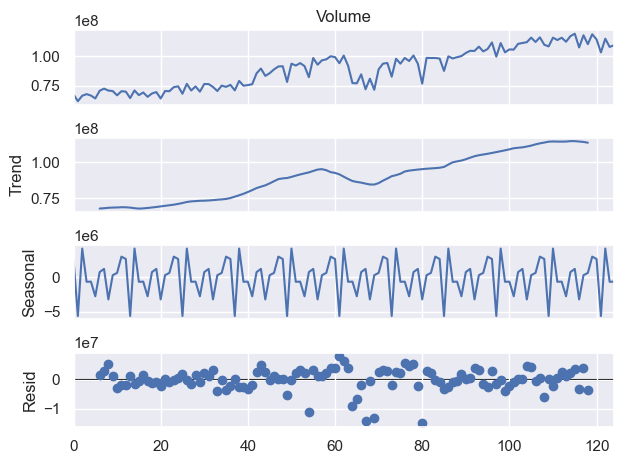

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_add = seasonal_decompose(df_monthly_oil['Volume'], model='additive', period=12)
decompose_result_add.plot()
plt.show()

### Conclusions

1. Production volume exhibits a sustained upward trajectory, indicating a non-stationary process driven by long-term structural growth rather than random fluctuation.
2. The trend component confirms a persistent long-term growth pattern, with localized slowdowns but no reversal of direction.
3. A stable and recurring seasonal pattern is present, with consistent amplitude across time.
4. Residuals are approximately zero-mean but retain episodic volatility and mild autocorrelation, suggesting additional short-term dynamics.

### Modelling Implications

1. Data is non-stationary so differencing or trend modelling is required.
2. Stationarity assumption violated
3. Include lag features
4. Use walk-forward validation
5. Scaling(Min/Max Scaler) due to increasing variance over time.